# Deterministic description

This notebook is an interactive version of the paper's code base.

Feel free to explore the system's evolution for different (modifiable) parameter values.

![Pipeline](Figure1.png "Pipeline")



In [47]:
using DrWatson
@quickactivate "ChaosNoiseEGT"

include(srcdir("PayoffMatrix.jl"))
include(srcdir("DeterministicSRC.jl"))
include(srcdir("Graphs.jl"))
include(srcdir("Quantifiers.jl"))

using DynamicalSystems
using PyPlot

## 1. Input

### *Fixed input*

#### Payoff matrix
Payoff matrix of the ACT/Skyrms attractor

In [2]:
display(payoff_matrix)

4×4 Matrix{Float64}:
  0.0   -0.6  0.0   1.0
  1.0    0.0  0.0  -0.5
 -1.05  -0.2  0.0   1.75
  0.5   -0.1  0.1   0.0

#### Initial conditions
The ACT/Skyrms' attractor can be properly seen starting with initial conditions close to the center of the simplex.
Therefore, for a robust analysis of the attractor we recommend the following initial conditions:
`ini_con = [0.25,0.25,0.25,0.25]`

_Note: the sum of all initial conditions should be equal to 1. (The quantities represent frequencies/relative amounts, therefore they should be normalised.)_



In [3]:
ini_con = [0.25,0.25,0.25,0.25]

4-element Vector{Float64}:
 0.25
 0.25
 0.25
 0.25

### *Modifiable input* (interactive)

#### Parameters
You can freely modify the following parameter(s):

* $\beta$: selection intensity coefficient

In [4]:
B = 0.1

0.1

## 2. Update rule

### Generalised pairwise comparison process
Set of ordinary differential equations (ODEs) of the deterministic description:

$$\dot{x_i} = \sum_{j=1}^{d} x_ix_j\tanh\left[\frac{\beta}{2}(f_i(\vec{x}) - f_j(\vec{x}))\right] \hspace{5mm} i=1,..,d$$

The input (fixed and modifiable) are already included in `ODE_sys`.

In [5]:
ODE_sys = ContinuousDynamicalSystem(dynamic_rule_PCP!, ini_con, B)

4-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      true
 dynamic rule:  dynamic_rule_PCP!
 ODE solver:    Tsit5
 ODE kwargs:    (abstol = 1.0e-6, reltol = 1.0e-6)
 parameters:    0.1
 time:          0.0
 state:         [0.25, 0.25, 0.25, 0.25]


## 3. Data
Solution of the ODE system for the stated parameter(s) and initial condition values.

In [6]:
Data, t = generate_trajectory(ODE_sys, B)
Data

4-dimensional StateSpaceSet{Float64} with 100001 points
 0.25      0.25       0.25       0.25
 0.249766  0.250076   0.25008    0.250077
 0.249532  0.250149   0.250165   0.250153
 0.249299  0.250219   0.250255   0.250228
 0.249067  0.250285   0.250348   0.2503
 0.248835  0.250347   0.250447   0.250372
 0.248603  0.250406   0.250549   0.250441
 0.248372  0.250462   0.250656   0.25051
 0.248142  0.250514   0.250767   0.250577
 0.247912  0.250563   0.250883   0.250642
 ⋮                               
 0.562667  0.0865606  0.0255252  0.325247
 0.562561  0.087095   0.0251253  0.325219
 0.562447  0.0876326  0.0247316  0.325189
 0.562325  0.0881733  0.0243442  0.325158
 0.562195  0.0887171  0.0239629  0.325125
 0.562057  0.0892642  0.0235876  0.325092
 0.561911  0.0898144  0.0232183  0.325056
 0.561757  0.0903679  0.0228549  0.32502
 0.561596  0.0909245  0.0224972  0.324982

## 4.1 Graph
* Ternary plot

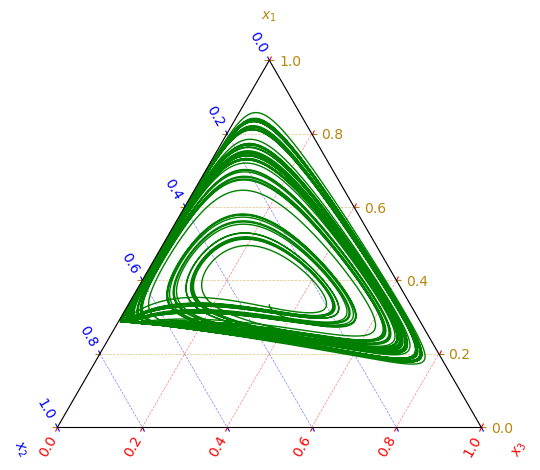

In [7]:
ternary_plot(Data[:,1],Data[:,2],Data[:,3])
gcf()

* Time series
    - Full time series

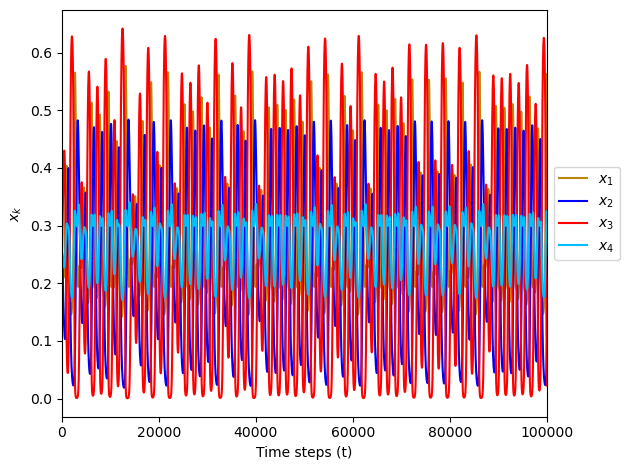

In [8]:
plt.clf()
timeseries(Data[:,1],Data[:,2],Data[:,3],Data[:,4])
gcf()

- First `xlim_value` time points 

To change the range of the x-axis, modify the `xlim_value` (it must be an integer!).

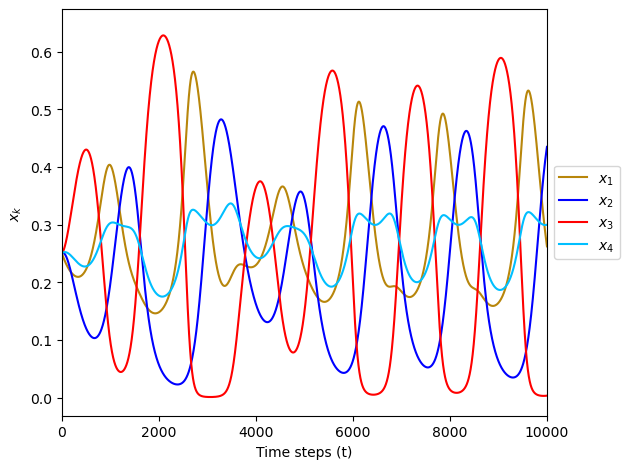

In [9]:
#xlim_value must be an integer!
xlim_value = 10000

plt.clf()
timeseries(Data[:,1],Data[:,2],Data[:,3],Data[:,4];xlim=xlim_value)
gcf()

## 4.2 Quantify
* Fractal dimension

*Note: The fractal dimension is a quantifier that takes long to calculate*

In [10]:
FD_info = fractal_dimension(Data)[1]
println("The fractal dimension of the system is: "*string(FD_info))

The fractal dimension of the system is: 1.77255


* Permutation entropy

In [49]:
PE = permutation_entropy(Data)
println("The normalised permutation entropy of the system is: "*string(PE))

The normalised permutation entropy of the system is: 0.16356265176822316


* Standard deviation

In [12]:
STD_info = standard_deviation(Data)
for i in 1:4
    println("The standard deviation of x"*string(i)*" is: "*string(STD_info[i]))
end

The standard deviation of x1 is: 0.109
The standard deviation of x2 is: 0.145
The standard deviation of x3 is: 0.209
The standard deviation of x4 is: 0.046


* Lyapunov exponents

*Note: The Lyapunov spectrum is a quantifier that takes long to calculate*

In [13]:
lyapunov_spectrum = lyapunovspectrum(ODE_sys, length(t))
println("Lyapunov spectrum")
println(lyapunov_spectrum)
for i in lyapunov_spectrum
    if i > 0
        println("At one positive Lyapunov exponent.")
        break
    else
        println("No positive Lyapunov exponents.")
    end
end

Lyapunov spectrum
[0.00018909652331489454, 1.6112309486473862e-6, -1.321689345353869e-6, -0.007171972190944575]
At one positive Lyapunov exponent.


* Fourier spectrum

To change the range of the x-axis, modify the `xlim_val`.

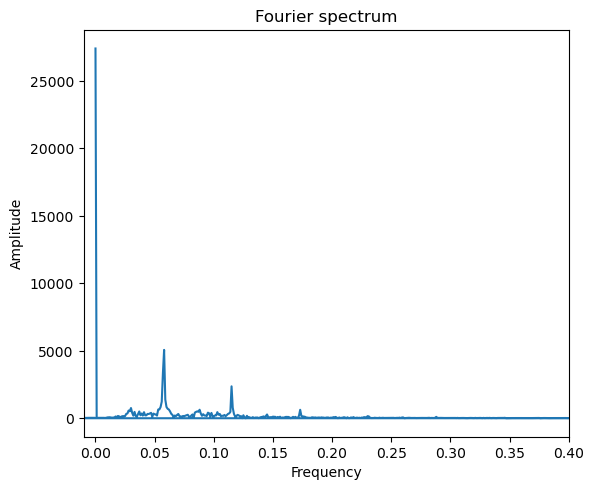

In [14]:
plt.clf()
xlim_val = 0.4
fourier_spectrum(Data, xlim_val)
gcf()